### Dragon Real Estate - Price Predictor

### Performing a house prediction model using the parameters present below

In [1]:
### The various input paramters present are:
### CRIM      per capita crime rate by town
### ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
### INDUS     proportion of non-retail business acres per town
### CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
### NOX       nitric oxides concentration (parts per 10 million)
### RM        average number of rooms per dwelling
### AGE       proportion of owner-occupied units built prior to 1940
### DIS       weighted distances to five Boston employment centres
### RAD       index of accessibility to radial highways
### TAX       full-value property-tax rate per 10,000 dollars
### PTRATIO   pupil-teacher ratio by town
### B         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
### LSTAT     % lower status of the population

### The output label is:
### MEDV     Median value of owner-occupied homes in $1000's

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("E:\Projects\ML Project 1\data.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Missing Attributes

In [8]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
housing.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [12]:
imputer.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20800e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [13]:
X = imputer.transform(housing)

In [14]:
housing = pd.DataFrame(X, columns=housing.columns)

In [15]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D884717B48>,
      dtype=object)

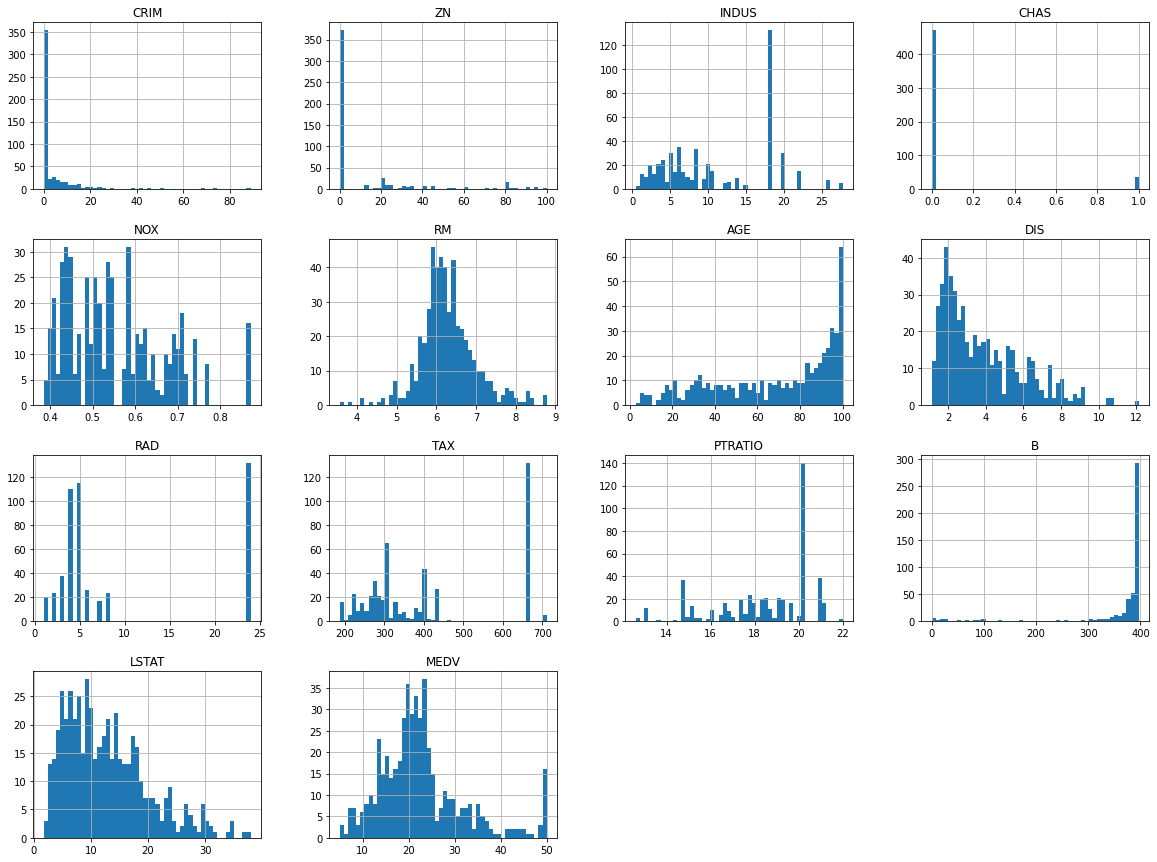

In [17]:
# For plotting histogram
import matplotlib.pyplot as plt
import seaborn as sns
housing.hist(bins=50, figsize=(20, 15))

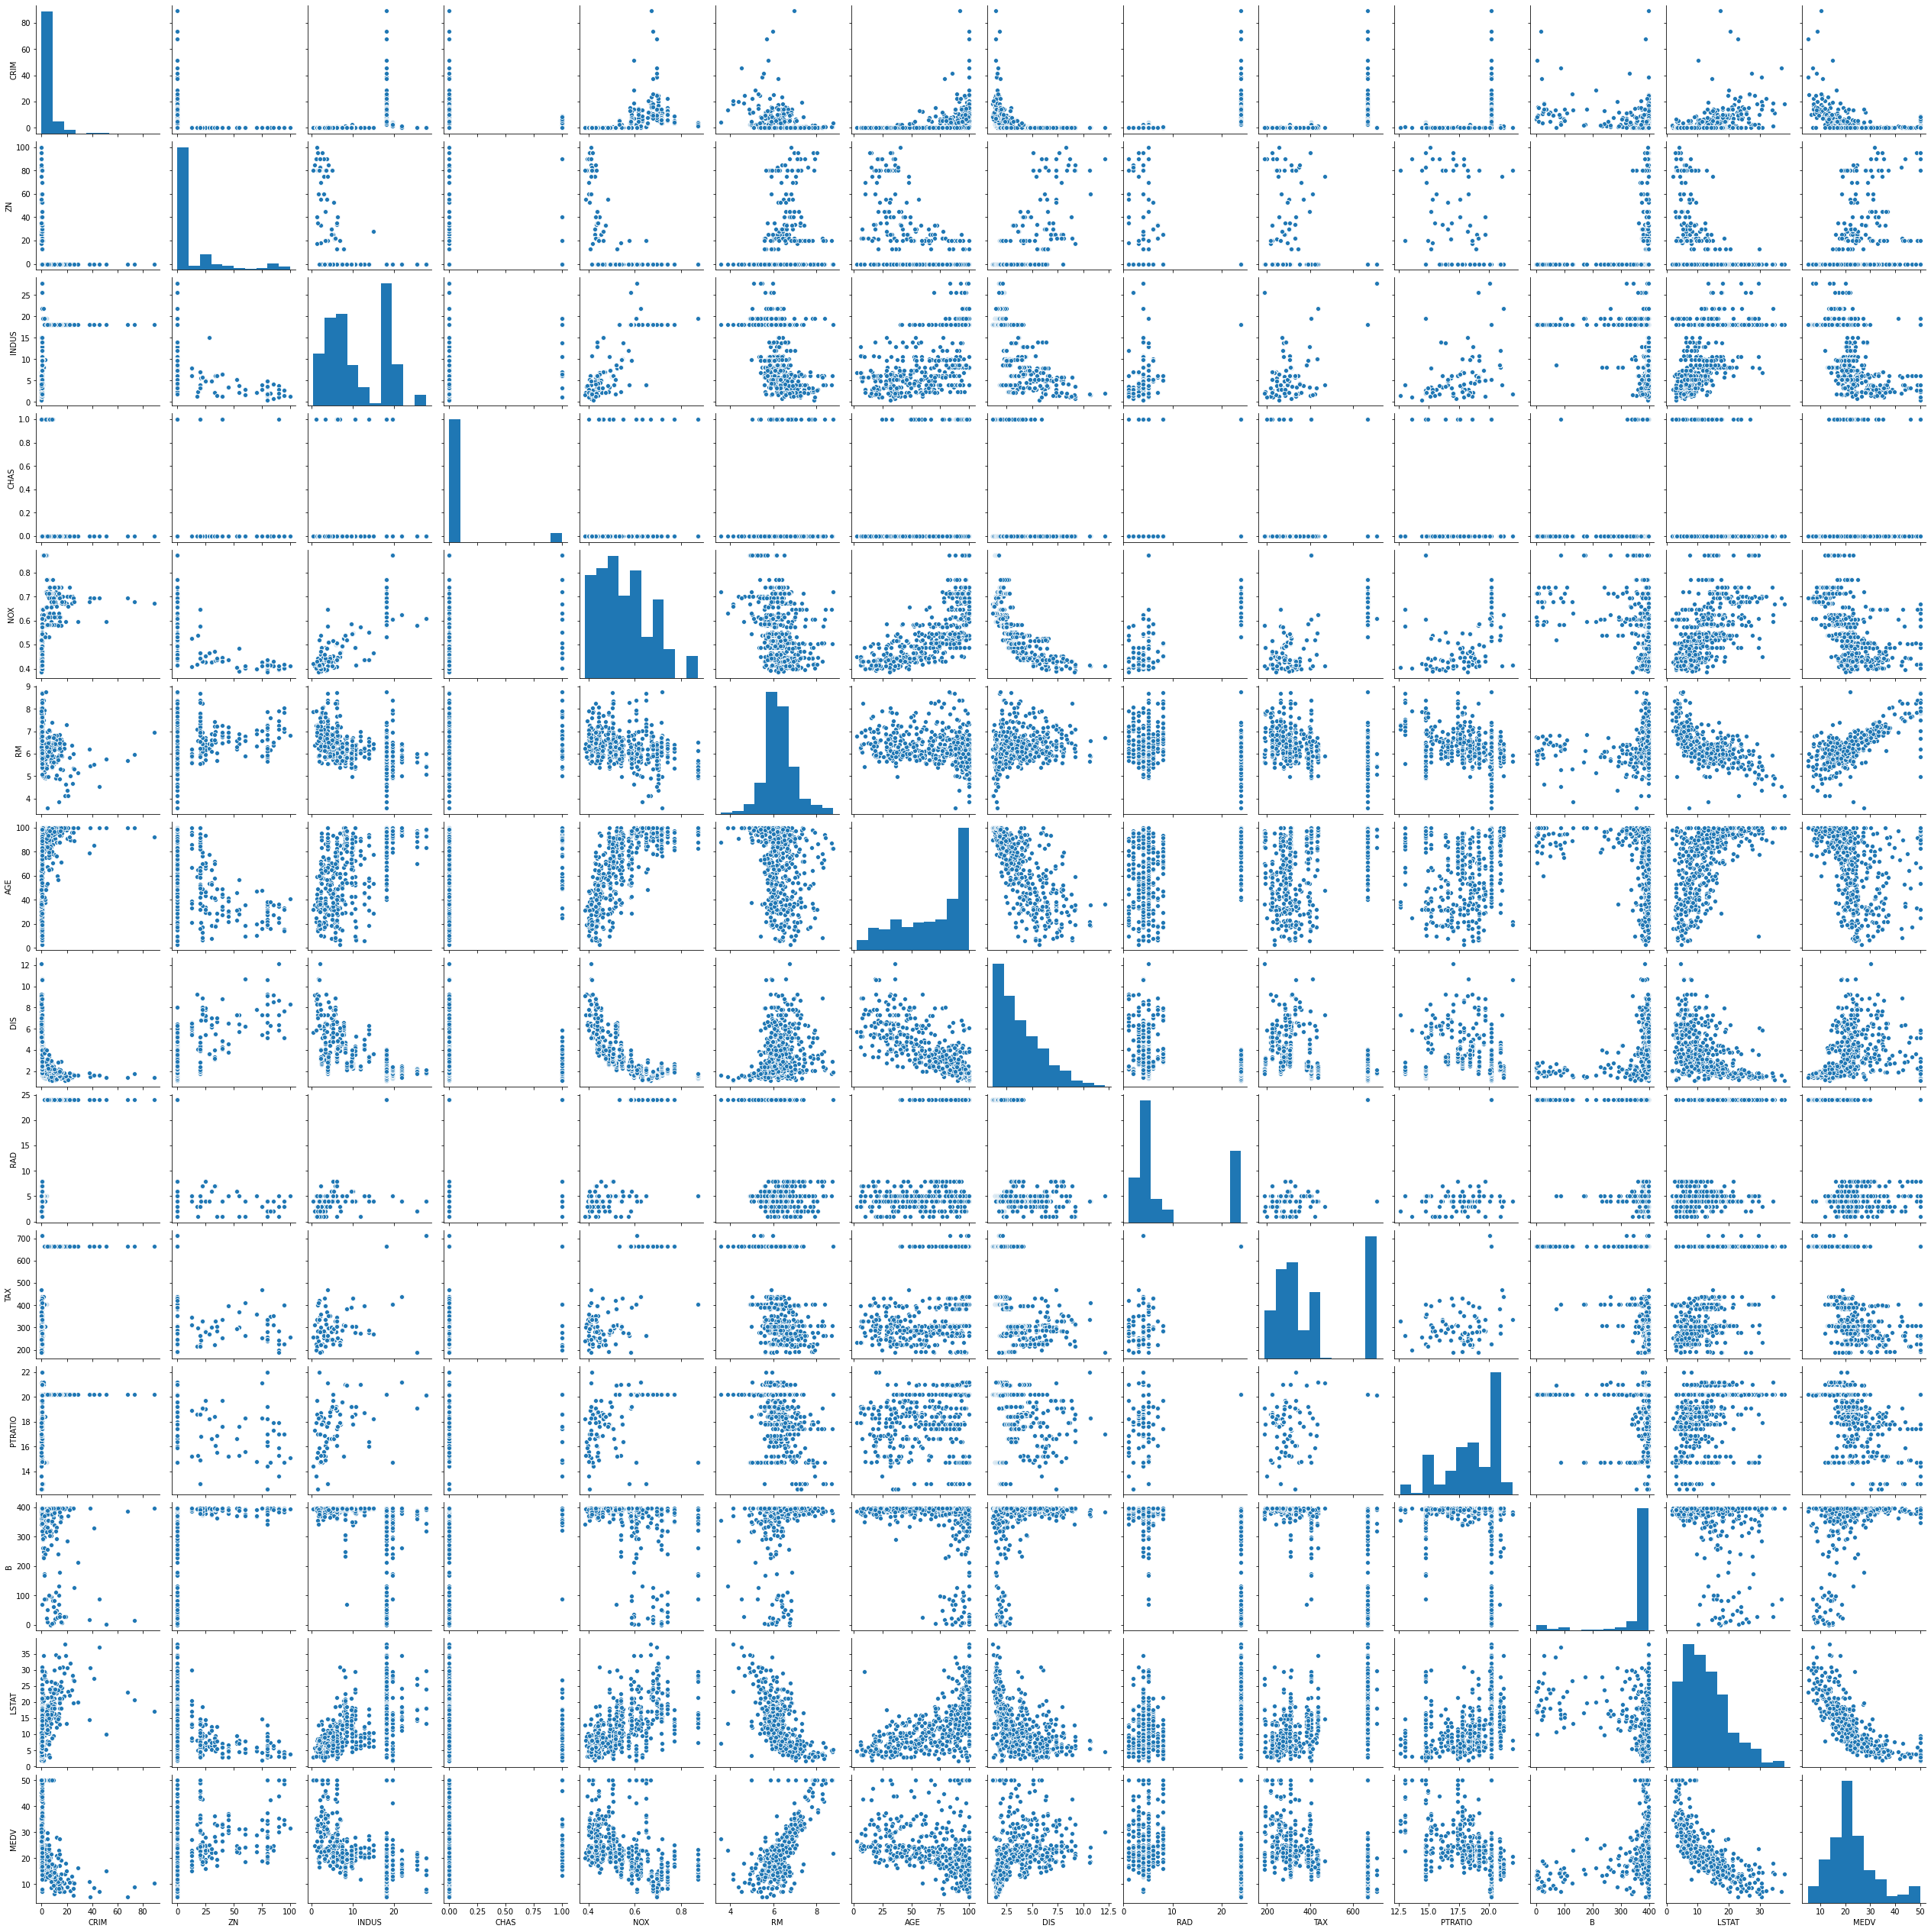

In [18]:
sns.pairplot(housing)

### Train-Test Splitting

In [19]:
from sklearn.model_selection import train_test_split

X=housing.iloc[:,:-1] ## independent features
y=housing.iloc[:,-1] ## dependent features

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(y_train)}\nRows in test set: {len(y_test)}\n")

Rows in train set: 404
Rows in test set: 102



In [20]:
## Since there is an imbalance in the class variable, we are going to reconsider doing the train test split. This time 
## the train test split will be done using stratified sampling strategy

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


#for X_train, X_test, y_train, y_test in split.split(X,y, housing['CHAS']):
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
## Now the train test split has been well considering the classification variable CHAS. Checking the counts below

In [23]:
strat_test_set['CHAS'].value_counts()

0.0    95
1.0     7
Name: CHAS, dtype: int64

In [24]:
strat_train_set['CHAS'].value_counts()

0.0    376
1.0     28
Name: CHAS, dtype: int64

In [25]:
# housing = strat_train_set.copy()

### Checking for Correlations

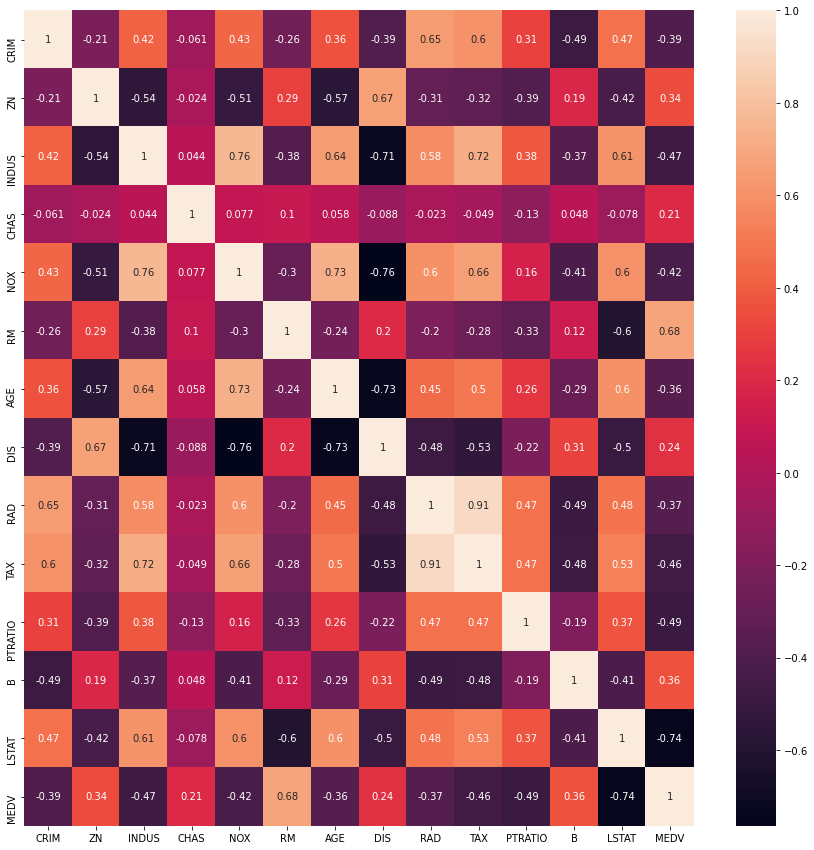

In [26]:
corr_matrix = strat_train_set.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)

### Creating a Pipeline to perform standard scaling on feature data and impute the missing values

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


X_train = strat_train_set.iloc[:,:-1]
y_train = strat_train_set.iloc[:,-1]

X_test = strat_test_set.iloc[:,:-1]
y_test = strat_test_set.iloc[:,-1]

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [28]:
X_train_tr = my_pipeline.fit_transform(X_train)

In [29]:
X_train_tr.shape

(404, 13)

### Selecting a desired model for Dragon Real Estates

### Performing linear regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model_lr = LinearRegression()
model_lr.fit(X_train_tr, y_train)

LinearRegression()

In [33]:
X_test_tr = my_pipeline.transform(X_test)

In [34]:
y_predict = model_lr.predict(X_test_tr)
y_predict

array([22.69983272, 17.21815502, 30.02256625, 30.74783795,  8.89539548,
       13.32148841, 17.33681073, 17.75889248, 32.49834802, 36.03962078,
       16.35541066,  0.56738128, 23.00033963, 20.45399288, 20.07201422,
       12.94766818, 31.15262634, 13.42946435, 25.03385031, 24.16495174,
       20.41387012, 17.0338272 , 17.78878779, 25.59397352, 19.48928859,
       32.82679565, 19.43993796, 33.71210114,  8.03170916, 34.67827814,
       19.5568122 , 21.44807669, 29.29996482, 16.34263865, 26.9868779 ,
       18.36286684, 37.29076992, 24.57519161, 22.25481536, 37.13557448,
       25.15390084, 34.46736322, 23.46329939, 24.04299119, 18.502283  ,
       32.68878775, 38.4564994 , 21.41856215, 17.66114337, 16.30916881,
       21.22362829, 12.41736107, 19.9342444 , 20.41549456, 27.97759117,
       33.08898049, 40.09881249, 31.36239485, 14.94924972, 19.75567963,
       40.46390102, 18.11136595, 15.18152805, 27.64652742, 19.49918501,
       32.47479224, 23.41649097, 20.31963204, 21.17792374, 33.77

In [35]:
y_test

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

### Evaluating the regression model

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error
#housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [37]:
rmse

4.143881810803006

### Using better evaluation technique on regression model - Cross Validation

In [38]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_lr, X_train_tr, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [39]:
rmse_scores

array([4.22231147, 4.26438262, 5.09418985, 3.8308113 , 5.37605151,
       4.41077887, 7.4727464 , 5.48549507, 4.14610632, 6.07178146])

In [40]:
## This function presents the scores of the model

def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [41]:
print_scores(rmse_scores)

Scores: [4.22231147 4.26438262 5.09418985 3.8308113  5.37605151 4.41077887
 7.4727464  5.48549507 4.14610632 6.07178146]
Mean:  5.037465485528445
Standard deviation:  1.059452504334149


### Saving the regression model

In [43]:
from joblib import dump, load
dump(model_lr, 'regression.joblib') 

['regression.joblib']

### Using the regression model on the test data

In [44]:
from joblib import dump, load
import numpy as np
model = load('regression.joblib') 

model.predict(X_test_tr)

array([22.69983272, 17.21815502, 30.02256625, 30.74783795,  8.89539548,
       13.32148841, 17.33681073, 17.75889248, 32.49834802, 36.03962078,
       16.35541066,  0.56738128, 23.00033963, 20.45399288, 20.07201422,
       12.94766818, 31.15262634, 13.42946435, 25.03385031, 24.16495174,
       20.41387012, 17.0338272 , 17.78878779, 25.59397352, 19.48928859,
       32.82679565, 19.43993796, 33.71210114,  8.03170916, 34.67827814,
       19.5568122 , 21.44807669, 29.29996482, 16.34263865, 26.9868779 ,
       18.36286684, 37.29076992, 24.57519161, 22.25481536, 37.13557448,
       25.15390084, 34.46736322, 23.46329939, 24.04299119, 18.502283  ,
       32.68878775, 38.4564994 , 21.41856215, 17.66114337, 16.30916881,
       21.22362829, 12.41736107, 19.9342444 , 20.41549456, 27.97759117,
       33.08898049, 40.09881249, 31.36239485, 14.94924972, 19.75567963,
       40.46390102, 18.11136595, 15.18152805, 27.64652742, 19.49918501,
       32.47479224, 23.41649097, 20.31963204, 21.17792374, 33.77

### Performing Decision Tree regression

In [46]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train_tr, y_train)

DecisionTreeRegressor()

In [47]:
X_test_tr = my_pipeline.transform(X_test)

In [48]:
y_predict = model_dt.predict(X_test_tr)
y_predict

array([29.8, 10.9, 29.4, 23.3, 20. , 13.8, 23.7, 11.5, 41.3, 43.8, 22.4,
       11.9, 21.6, 23.1, 19. , 11.3, 32.7, 14.8, 25. , 15. , 19.6, 14.5,
       11.9, 22.9, 16.1, 31.6, 17.1, 33.1, 10.2, 32.7, 18.5, 20.6, 23.9,
       11.9, 22.3,  8.3, 48.8, 25.2, 20.7, 46. , 25. , 22.8, 19.5, 19.4,
       16.2, 33.2, 44.8, 19. , 20.6, 23.1, 24.5, 13.1, 22.4, 17.1, 28.6,
       31.7, 37.6, 30.8, 19.4, 19.9, 50. ,  5. , 17.6, 23.9, 18.1, 28.7,
       17.4, 13.4, 21.4, 36.4, 24.3, 22. , 18.5, 20.5, 32.7, 13.8, 15.6,
       19.6, 19.9, 20.9, 23.9, 19.9, 13.4, 23.9, 23.3, 21.2,  8.7, 20.3,
       18.9, 23.1, 17.5, 22. ,  6.3, 26.6, 21.9, 28.2, 24.5, 28.7,  8.5,
       28.6, 22. , 27.1])

In [49]:
y_test

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

### Evaluating the Decision Tree model

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [51]:
rmse

4.125803546215063

### Using better evaluation technique on decision tree model - Cross Validation

In [52]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_dt, X_train_tr, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores

array([3.7143755 , 5.31050501, 4.99345914, 3.88806805, 3.97114593,
       3.03512767, 7.71399702, 3.99208592, 3.34514574, 4.49972221])

In [54]:
print_scores(rmse_scores)

Scores: [3.7143755  5.31050501 4.99345914 3.88806805 3.97114593 3.03512767
 7.71399702 3.99208592 3.34514574 4.49972221]
Mean:  4.446363218907226
Standard deviation:  1.2731966601059972


### Saving the decision tree model

In [55]:
from joblib import dump, load
dump(model, 'decision_tree.joblib') 

['decision_tree.joblib']

### Using the decision tree regressor model on the test data

In [56]:
from joblib import dump, load
import numpy as np
model = load('decision_tree.joblib') 
model.predict(X_test_tr)

array([22.69983272, 17.21815502, 30.02256625, 30.74783795,  8.89539548,
       13.32148841, 17.33681073, 17.75889248, 32.49834802, 36.03962078,
       16.35541066,  0.56738128, 23.00033963, 20.45399288, 20.07201422,
       12.94766818, 31.15262634, 13.42946435, 25.03385031, 24.16495174,
       20.41387012, 17.0338272 , 17.78878779, 25.59397352, 19.48928859,
       32.82679565, 19.43993796, 33.71210114,  8.03170916, 34.67827814,
       19.5568122 , 21.44807669, 29.29996482, 16.34263865, 26.9868779 ,
       18.36286684, 37.29076992, 24.57519161, 22.25481536, 37.13557448,
       25.15390084, 34.46736322, 23.46329939, 24.04299119, 18.502283  ,
       32.68878775, 38.4564994 , 21.41856215, 17.66114337, 16.30916881,
       21.22362829, 12.41736107, 19.9342444 , 20.41549456, 27.97759117,
       33.08898049, 40.09881249, 31.36239485, 14.94924972, 19.75567963,
       40.46390102, 18.11136595, 15.18152805, 27.64652742, 19.49918501,
       32.47479224, 23.41649097, 20.31963204, 21.17792374, 33.77

### Performing random forest regression

In [57]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
# model = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_rf.fit(X_train_tr, y_train)

RandomForestRegressor()

In [58]:
X_test_tr = my_pipeline.transform(X_test)

In [59]:
y_predict = model_rf.predict(X_test_tr)
y_predict

array([24.787, 11.466, 25.285, 21.365, 18.632, 14.726, 19.956, 14.465,
       31.269, 40.875, 19.004, 11.807, 23.646, 31.933, 19.581, 10.906,
       31.414, 14.249, 23.601, 18.561, 19.85 , 18.032, 17.419, 21.869,
       18.985, 31.631, 15.805, 33.032,  8.848, 33.035, 23.955, 21.354,
       22.438, 10.666, 20.983, 10.727, 42.107, 24.56 , 23.159, 43.492,
       23.869, 31.157, 20.361, 20.712, 19.493, 33.454, 44.052, 20.159,
       20.489, 21.872, 21.724, 14.659, 21.83 , 14.607, 25.087, 32.682,
       42.086, 29.177, 20.236, 20.849, 46.142,  9.57 , 19.185, 25.198,
       14.586, 32.968, 20.318, 18.312, 19.498, 34.755, 26.6  , 22.355,
       21.444, 22.411, 34.672, 13.351, 15.692, 20.099, 20.653, 21.556,
       22.039, 21.142, 13.914, 22.398, 20.877, 21.127, 13.478, 21.27 ,
       21.35 , 23.687, 18.423, 27.247,  7.477, 26.764, 19.423, 29.192,
       20.051, 31.693, 14.486, 26.89 , 21.362, 20.353])

In [60]:
y_test

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

### Evaluating the regression model

In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [62]:
rmse

2.985059627610837

### Using better evaluation technique on regression model - Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf, X_train_tr, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [64]:
rmse_scores

array([2.87444236, 2.94185594, 4.44202694, 2.5636488 , 3.30204939,
       2.74678079, 4.56104387, 3.28992413, 3.2215123 , 3.20060961])

In [65]:
print_scores(rmse_scores)

Scores: [2.87444236 2.94185594 4.44202694 2.5636488  3.30204939 2.74678079
 4.56104387 3.28992413 3.2215123  3.20060961]
Mean:  3.314389414292028
Standard deviation:  0.6376646579337172


### Saving the random forest regression model

In [66]:
from joblib import dump, load
dump(model, 'random_forest.joblib') 

['random_forest.joblib']

### Using the regression model on the test data

In [67]:
from joblib import dump, load
import numpy as np
model = load('random_forest.joblib') 

model.predict(X_test_tr)

array([22.69983272, 17.21815502, 30.02256625, 30.74783795,  8.89539548,
       13.32148841, 17.33681073, 17.75889248, 32.49834802, 36.03962078,
       16.35541066,  0.56738128, 23.00033963, 20.45399288, 20.07201422,
       12.94766818, 31.15262634, 13.42946435, 25.03385031, 24.16495174,
       20.41387012, 17.0338272 , 17.78878779, 25.59397352, 19.48928859,
       32.82679565, 19.43993796, 33.71210114,  8.03170916, 34.67827814,
       19.5568122 , 21.44807669, 29.29996482, 16.34263865, 26.9868779 ,
       18.36286684, 37.29076992, 24.57519161, 22.25481536, 37.13557448,
       25.15390084, 34.46736322, 23.46329939, 24.04299119, 18.502283  ,
       32.68878775, 38.4564994 , 21.41856215, 17.66114337, 16.30916881,
       21.22362829, 12.41736107, 19.9342444 , 20.41549456, 27.97759117,
       33.08898049, 40.09881249, 31.36239485, 14.94924972, 19.75567963,
       40.46390102, 18.11136595, 15.18152805, 27.64652742, 19.49918501,
       32.47479224, 23.41649097, 20.31963204, 21.17792374, 33.77

In [68]:
## Considering the RMSE value, we find that the Ramdom Forest Regressor has least error rate and hence forms better fit 
## than other two models